In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/dogscats/"
sz=224

In [5]:
torch.cuda.is_available()
torch.backends.cudnn.enabled

True

In [6]:
os.listdir(PATH)

['sample', 'valid', 'models', 'train', 'tmp', 'test1']

In [7]:
os.listdir(f'{PATH}valid')

['canada', 'us']

In [8]:
#files = os.listdir(f'{PATH}valid/cats')[:5]
files = os.listdir(f'{PATH}valid/us')[:5]
files

['images5.jpg',
 'images (2).jpg',
 'Passports-Overlap.jpg',
 'images (7).jpg',
 'images (3).jpg']

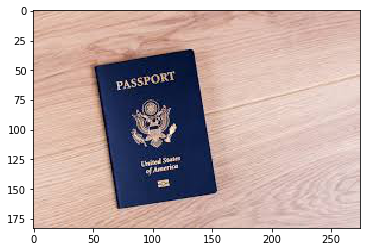

In [9]:
img = plt.imread(f'{PATH}valid/us/{files[0]}')
plt.imshow(img);

In [10]:
img.shape
img[:4,:4]

array([[[198, 161, 143],
        [199, 162, 144],
        [200, 163, 145],
        [203, 166, 148]],

       [[222, 185, 167],
        [217, 180, 162],
        [210, 173, 155],
        [205, 168, 150]],

       [[213, 176, 158],
        [213, 176, 158],
        [215, 178, 160],
        [217, 180, 162]],

       [[219, 182, 164],
        [220, 183, 165],
        [222, 185, 167],
        [221, 184, 166]]], dtype=uint8)

In [17]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.954488   1.238064   0.5       
    1      0.905144   1.028991   0.538462        



[1.0289905, 0.5384615659713745]

In [12]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['canada', 'us']

In [14]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(26, 2)

In [15]:
log_preds[:10]

array([[-0.23704, -1.55571],
       [-0.35049, -1.21854],
       [-0.49197, -0.94526],
       [-0.4347 , -1.04259],
       [-0.487  , -0.95312],
       [-0.26508, -1.45734],
       [-0.92601, -0.5044 ],
       [-0.82527, -0.57646],
       [-0.82409, -0.57738],
       [-0.49954, -0.93346]], dtype=float32)

In [16]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)